# Import tabular data

The tabular data is imported. This contains information on whether several elements are present in the image, such as blur, a human, a group, etc. Also the pawpularity score of the training data is in the table. For the test data only the image ID and the features are in the table. There is also a sample submission table, which contains the pawpularity score for the test data.

In [19]:
import pandas as pd

chdir("C:\\Users\\Cass Maes\\Documents\\PPP\\MinorAI\\ML_project\\CassBenteDemiIlse")

# import the CSV tables
csv_train_data = pd.read_csv("petfinder-pawpularity-score/train.csv")
csv_test_data = pd.read_csv("petfinder-pawpularity-score/test.csv")
sample_submission = pd.read_csv("petfinder-pawpularity-score/sample_submission.csv")
csv_train_data.head()

# Drop rows with missing values (if NaN values are in dataframe)
# no missing values present, so no samples dropped
csv_train_data.dropna()

ERROR! Session/line number was not unique in database. History logging moved to new session 317


,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9907,ffbfa0383c34dc513c95560d6e1fdb57,0,0,0,1,0,0,0,0,0,0,0,1,15
9908,ffcc8532d76436fc79e50eb2e5238e45,0,1,1,1,0,0,0,0,0,0,0,0,70
9909,ffdf2e8673a1da6fb80342fa3b119a20,0,1,1,1,0,0,0,0,1,1,0,0,20
9910,fff19e2ce11718548fa1c5d039a5192a,0,1,1,1,0,0,0,0,1,0,0,0,20


# Processing tabular data

In [2]:
# Select x-values (the 12 input features) from training data
x_train_tabular = csv_train_data.iloc[:,1:13].to_numpy()

# Select y-values (pawpularity) from training data
y_train_tabular = csv_train_data.iloc[:,13].to_numpy()

# Select x-values (12 input features) from testing data
x_test_tabular = csv_test_data.iloc[:,1:13].to_numpy()

# Select y-values (pawpularity) from testing data
y_test_tabular = sample_submission.iloc[:,1].to_numpy()

In [10]:
from tensorflow.keras import layers, models
from tensorflow.keras.losses import MeanSquaredError

def build_neural_net(input_size, hidden_nodes):
    """
    Build neural network with an input size and a hidden layer with a number of hidden nodes.
    """
    # Create a sequential model object
    model = models.Sequential()

    # Create the hidden layer with relu activations
    model.add(layers.Dense(units=hidden_nodes, activation='relu', input_shape=(input_size,)))
    
    # Create the output layer with 1 regression output unit
    model.add(layers.Dense(units=1))
    
    # Compile the network with the appropriate loss function
    model.compile(loss=MeanSquaredError())
    
    return model

# Create neural network for tabular data and get summary of model
tabular_NN = build_neural_net(12, 20)
tabular_NN.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 20)                260       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 21        
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________
ERROR! Session/line number was not unique in database. History logging moved to new session 301


Train on 8920 samples, validate on 992 samples
Epoch 1/20
8920/8920 [==============================] - 1s 104us/sample - loss: 1405.3654 - val_loss: 860.6232
Epoch 2/20
8920/8920 [==============================] - 1s 61us/sample - loss: 575.5181 - val_loss: 472.2550
Epoch 3/20
8920/8920 [==============================] - 1s 69us/sample - loss: 474.5670 - val_loss: 457.8112
Epoch 4/20
8920/8920 [==============================] - 1s 60us/sample - loss: 465.1400 - val_loss: 449.3608
Epoch 5/20
8920/8920 [==============================] - 1s 68us/sample - loss: 458.7841 - val_loss: 443.1259
Epoch 6/20
8920/8920 [==============================] - 1s 63us/sample - loss: 454.0018 - val_loss: 438.8425
Epoch 7/20
8920/8920 [==============================] - 1s 66us/sample - loss: 450.1725 - val_loss: 434.8862
Epoch 8/20
8920/8920 [==============================] - 1s 64us/sample - loss: 446.3504 - val_loss: 431.9239
Epoch 9/20
8920/8920 [==============================] - 1s 63us/sample - loss: 

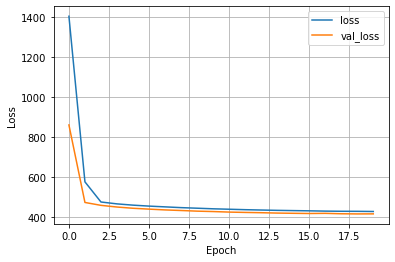

In [4]:
import matplotlib.pyplot as plt

# Part of code from: https://www.tensorflow.org/tutorials/keras/regression

# Train our model
history = tabular_NN.fit(x_train_tabular, y_train_tabular, batch_size=20, epochs=20, validation_split=.1)

# Store loss during training in DataFrame
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

def plot_loss(history):
    """
    Plot loss during epochs of training a neural network.
    """
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

plot_loss(history)

# See how the model scored
loss = tabular_NN.evaluate(x_test_tabular, y_test_tabular)

# Print to 3 decimals
print(f'Test loss: {loss:.3}')

# Import image data


In [6]:
from os import chdir, listdir
import matplotlib.pyplot as plt
import cv2

def reshape_images(path, n):
    """
    This function returns a list of images, which are reshaped to 64 x 64 
    and a list with the names of the images.
    """
    
    # set the current path
    chdir(path)
    
    # preset the lists
    images = []
    image_names = []
    
    # go over all the files in the path
    for i in listdir():
        
        # get the name of the image, without .jpg
        image_names.append(i[:-4])
        
        # get the image and reshape to n x n
        file = cv2.imread(i)
        file=cv2.resize(file,(n, n), interpolation=cv2.INTER_AREA)
        
        # rescale the pixels and store in the list
        images.append(file/255)
        
    return images, image_names

train_imgs, train_names = reshape_images("C:\\Users\\Cass Maes\\Documents\\PPP\\MinorAI\\ML_project\\CassBenteDemiIlse\\petfinder-pawpularity-score\\train", 64)
test_imgs, test_names = reshape_images("C:\\Users\\Cass Maes\\Documents\\PPP\\MinorAI\\ML_project\\CassBenteDemiIlse\\petfinder-pawpularity-score\\test", 64)


# Combine tabular data with images

In [21]:
def merge_images(data, images, names):
    """
    This function sorts the dataframe of the csv data according to the image names.
    """
    
    data_sorted = pd.DataFrame()

    for img, name in zip(images, names):
        location = data[data['Id'] == name].index[0]
        data_sorted = data_sorted.append([data.loc[location]])
        
    return data_sorted

train_data_sorted = merge_images(csv_train_data, train_imgs, train_names)
test_data_sorted = merge_images(csv_test_data, test_imgs, test_names)

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72
5,001dd4f6fafb890610b1635f967ea081,0,0,1,0,0,0,0,0,0,0,0,1,74
6,0023b8a3abc93c712edd6120867deb53,0,1,1,1,0,0,0,0,1,1,0,0,22
7,0031d6a9ef7340f898c3e05f92c7bb04,0,1,1,0,0,0,1,1,0,0,1,0,35
8,0042bc5bada6d1cf8951f8f9f0d399fa,0,1,1,1,0,0,0,0,0,0,0,0,53
9,0049cb81313c94fa007286e9039af910,0,1,1,1,0,0,0,0,0,0,0,0,21


In [23]:
sample_submission_sorted = merge_images(sample_submission, test_imgs, test_names)

In [24]:
# create new numpy arrays of sorted pawpularity scores
y_train_image = train_data_sorted['Pawpularity'].to_numpy()

y_test_image = sample_submission_sorted['Pawpularity'].to_numpy()


In [ ]:
# make numpy array of train images
train_imgs = train_imgs.to_numpy()
test_imgs = test_imgs.to_numpy()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Cass Maes\anaconda3\envs\progLab\lib\site-packages\IPython\core\interactiveshell.py", line 3441, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\CASSMA~1\AppData\Local\Temp/ipykernel_636/2978269425.py", line 2, in <module>
    train_imgs = train_imgs.to_numpy()
AttributeError: 'list' object has no attribute 'to_numpy'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Cass Maes\anaconda3\envs\progLab\lib\site-packages\IPython\core\interactiveshell.py", line 2061, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'AttributeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Cass Maes\anaconda3\envs\progLab\lib\site-packages\IPython\core\ultratb.py", line 1101, in get_records
    return _fixed

In [15]:
def build_convol_net(image_size, hidden_nodes):
    """
    Build neural network with an input size and a hidden layer with a number of hidden nodes.
    """
    # Create a sequential model object
    model = models.Sequential()
    
    # Create convolutional layer with relu activation
    model.add(layers.Conv2D(filters = 64, kernel_size = (3,3), activation='relu', input_shape=image_size))
    
    # Create a maxpool layer
    model.add(layers.MaxPool2D(pool_size=(2, 2), strides=2))
    
    # Create a flattening layer
    model.add(layers.Flatten())

    # Create the hidden layer with relu activations
    model.add(layers.Dense(units=hidden_nodes, activation='relu', input_shape=(image_size,)))
    
    # Create the output layer with 1 regression output unit
    model.add(layers.Dense(units=1))
    
    # Compile the network with the appropriate loss function
    model.compile(loss=MeanSquaredError())
    
    return model

ERROR! Session/line number was not unique in database. History logging moved to new session 312


In [ ]:
import tensorflow 

# Create neural network for image data and get summary of model
image_size = (64, 64, 3)
image_NN = build_convol_net(image_size, 20)
image_NN.summary()

# Part of code from: https://www.tensorflow.org/tutorials/keras/regression

# Train our model
history = image_NN.fit(train_imgs, y_train_image, batch_size=20, epochs=20, validation_split=.1)

# Store loss during training in DataFrame
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

def plot_loss(history):
    """
    Plot loss during epochs of training a neural network.
    """
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

plot_loss(history)

# See how the model scored
loss = image_NN.evaluate(test_imgs, y_test_image)

# Print to 3 decimals
print(f'Test loss: {loss:.3}')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 61504)             0         
_________________________________________________________________
dense_23 (Dense)             (None, 20)                1230100   
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 21        
Total params: 1,231,913
Trainable params: 1,231,913
Non-trainable params: 0
_________________________________________________________________
Traceback (most recent call last):
  File "C:\Users\Cass Maes\anaconda3\envs\progLab\lib\site-packages\IPytho